In [ ]:
#CUSTOMER SEGMENTATION FOR MARKETING

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

In [43]:
df=pd.read_csv("C:\\Users\\vatti\\Downloads\\Train.csv")

In [44]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [46]:
df['Segmentation'].value_counts()

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64

In [47]:
df['Profession'].value_counts()

Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

In [48]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [51]:
df = df.fillna(method='ffill')
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [50]:
df = df.drop(['ID'], axis = 1)

In [52]:
df.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Work_Experience'}>],
       [<Axes: title={'center': 'Family_Size'}>, <Axes: >]], dtype=object)

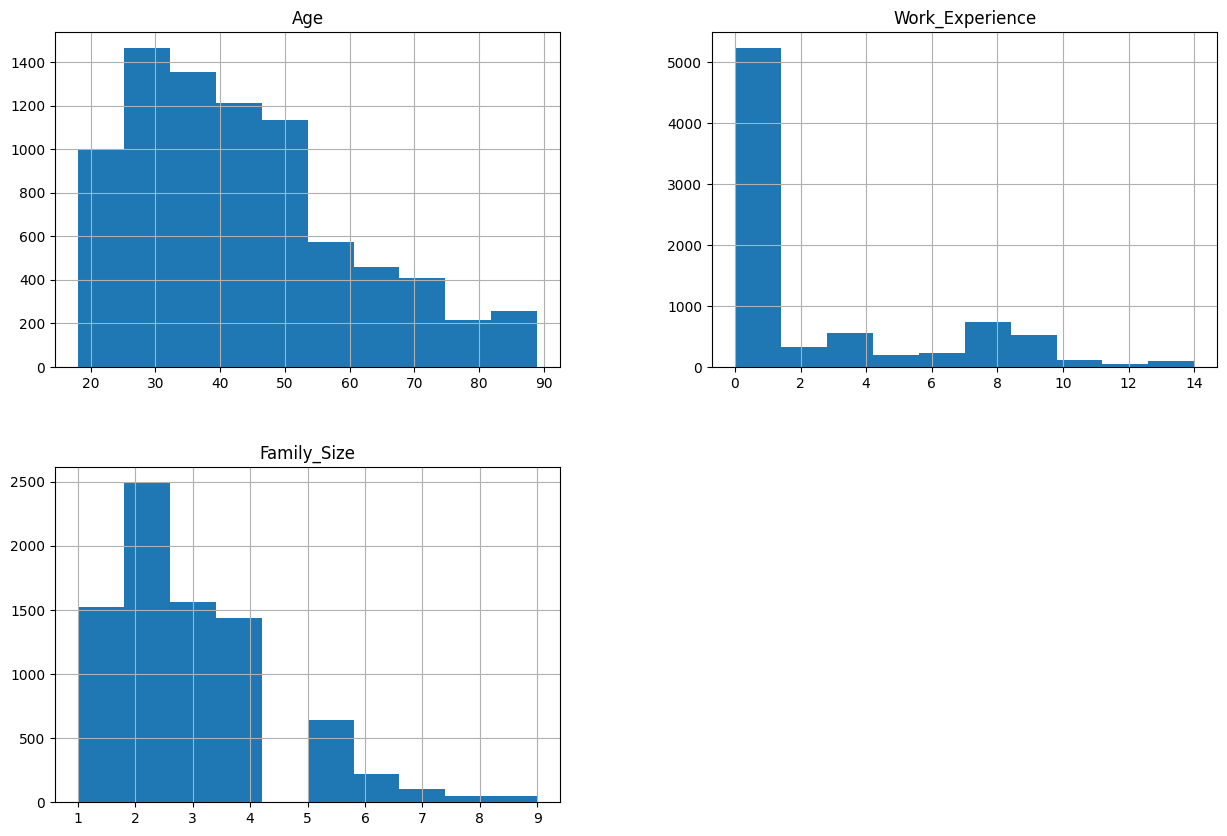

In [53]:
df.hist(bins=10, figsize=(15, 10))

<Axes: xlabel='Spending_Score', ylabel='count'>

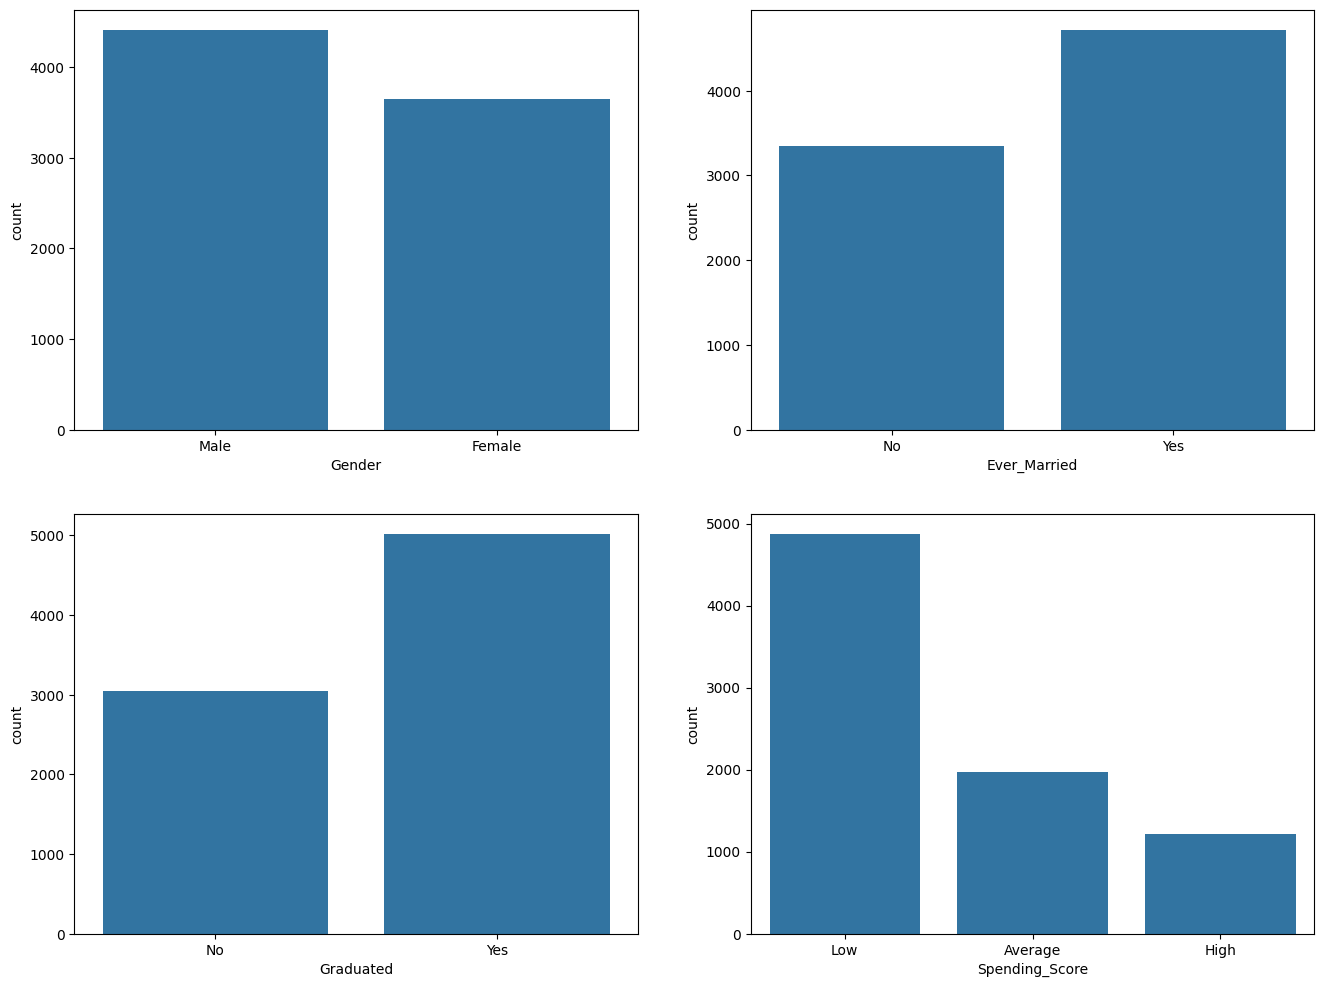

In [54]:
plt.figure(figsize = (16,12))
plt.subplot(2,2,1)
sns.countplot(x ='Gender', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='Ever_Married', data = df)
plt.subplot(2,2,3)
sns.countplot(x ='Graduated', data = df)
plt.subplot(2,2,4)
sns.countplot(x ='Spending_Score', data = df)

<Axes: xlabel='Segmentation', ylabel='count'>

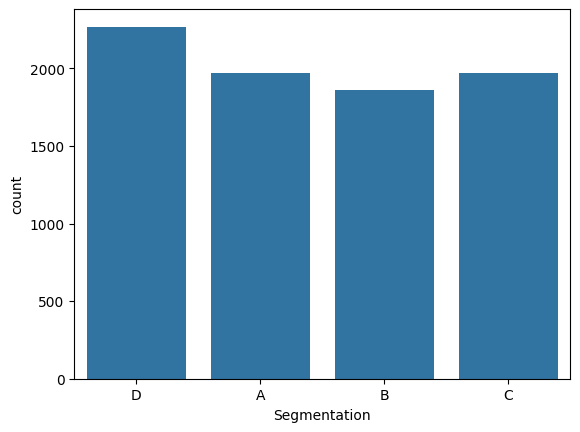

In [55]:
sns.countplot(x ='Segmentation', data = df)

<Axes: xlabel='Segmentation', ylabel='count'>

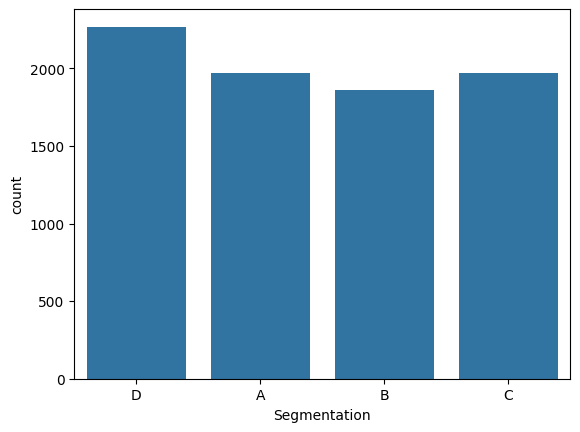

In [56]:
sns.countplot(x ='Segmentation', data = df)

<Axes: xlabel='Segmentation', ylabel='count'>

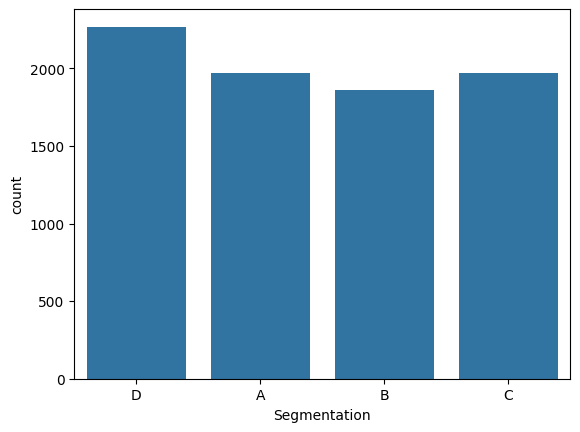

In [57]:
sns.countplot(x ='Segmentation', data = df)

<Axes: xlabel='Spending_Score', ylabel='count'>

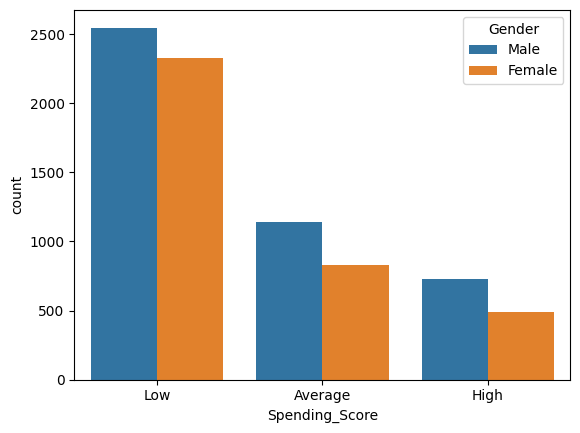

In [58]:
sns.countplot(x ='Spending_Score', hue = 'Gender', data = df)

<Axes: xlabel='Spending_Score', ylabel='count'>

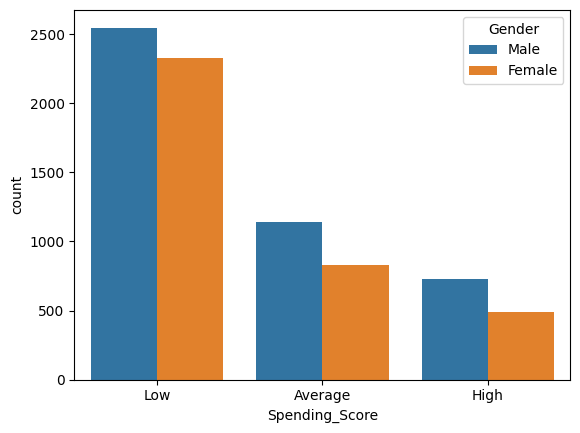

In [59]:
sns.countplot(x ='Spending_Score', hue = 'Gender', data = df)

<Axes: xlabel='Ever_Married', ylabel='count'>

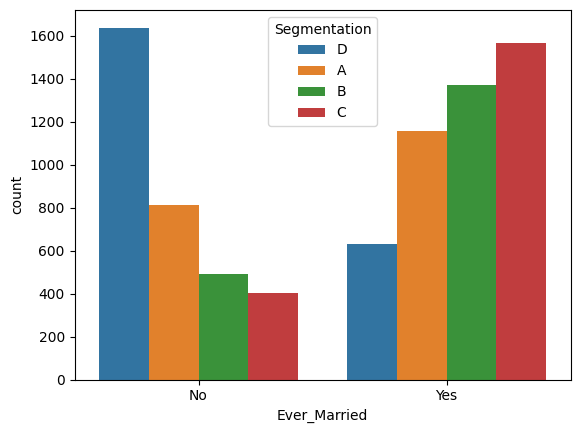

In [60]:
sns.countplot(x ='Ever_Married', hue = 'Segmentation', data = df)

<Axes: xlabel='Ever_Married', ylabel='count'>

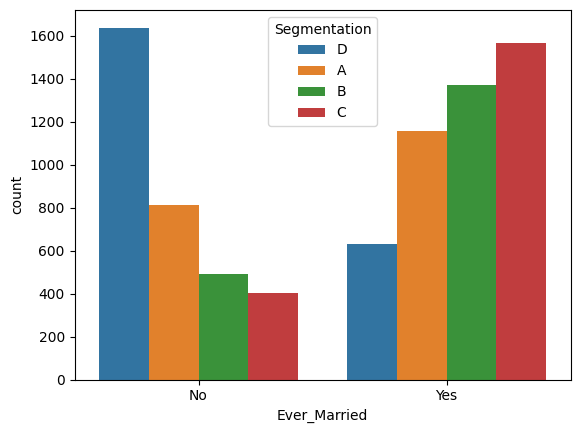

In [61]:
sns.countplot(x ='Ever_Married', hue = 'Segmentation', data = df)

<Axes: xlabel='Spending_Score', ylabel='count'>

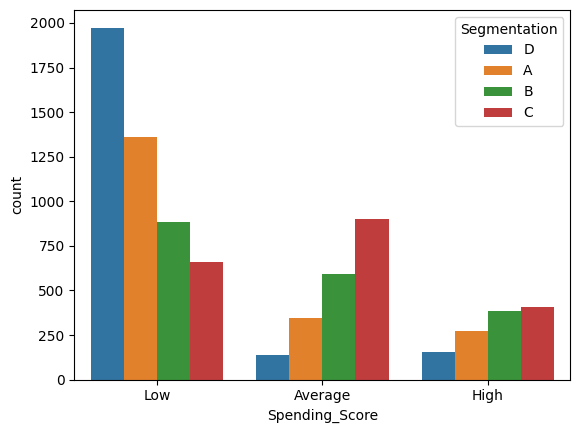

In [62]:
sns.countplot(x ='Spending_Score', hue = 'Segmentation', data = df)

In [64]:
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})
df['Ever_Married'] = df['Ever_Married'].replace({'No':0,'Yes':1})
df['Graduated'] = df['Graduated'].replace({'No':0,'Yes':1})
df['Spending_Score'] = df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})
df['Var_1'] = df['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})
df['Profession'] = df['Profession'].replace({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7,'Homemaker':8})
df['Segmentation'] = df['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3})

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [66]:
columns = ['Age', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']
for column in columns:
    df[[column]] = scaler.fit_transform(df[[column]])
    
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,-1.284623,0,-0.573748,-0.476931,0,0.753666,-0.798803,3
1,1,1,-0.327151,1,0.264991,-0.476931,1,0.100192,-0.798803,0
2,1,1,1.408268,1,0.264991,-0.476931,0,-1.206757,0.604363,1
3,0,1,1.408268,1,1.103729,-0.771563,2,-0.553283,0.604363,1
4,1,1,-0.207467,1,-0.154379,-0.771563,2,2.060615,0.604363,0


In [67]:
columns = ['Age', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']
for column in columns:
    df[[column]] = scaler.fit_transform(df[[column]])
    
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,-1.284623,0,-0.573748,-0.476931,0,0.753666,-0.798803,3
1,1,1,-0.327151,1,0.264991,-0.476931,1,0.100192,-0.798803,0
2,1,1,1.408268,1,0.264991,-0.476931,0,-1.206757,0.604363,1
3,0,1,1.408268,1,1.103729,-0.771563,2,-0.553283,0.604363,1
4,1,1,-0.207467,1,-0.154379,-0.771563,2,2.060615,0.604363,0


In [83]:
train_X = df.loc[:, 'Gender':'Var_1']
train_y = df.loc[:, 'Segmentation']

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=12)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11, leaf_size = 4, p =10)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=4, n_neighbors=11, p=10)

In [87]:
y_pred_knn = knn.predict(X_val)
y_pred_knn

array([1, 0, 1, ..., 2, 0, 1], dtype=int64)

In [88]:
y_pred_knn = knn.predict(X_val)
y_pred_knn

array([1, 0, 1, ..., 2, 0, 1], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score

acc_knn = accuracy_score(y_val, y_pred_knn)
print("Accuracy for KNN:", acc_knn)

Accuracy for KNN: 0.4826517967781908


In [93]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 5)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [94]:
y_pred_DT = dec_tree.predict(X_val)
y_pred_DT

array([0, 0, 3, ..., 1, 2, 3], dtype=int64)

In [95]:
acc_DT = accuracy_score(y_val, y_pred_DT)
print("Accuracy for Decision Tree:", acc_DT)

Accuracy for Decision Tree: 0.43742255266418834


In [96]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier()
ran_for.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
y_pred_RF = ran_for.predict(X_val)
y_pred_RF

array([0, 0, 0, ..., 1, 2, 1], dtype=int64)

In [98]:
acc_RF = accuracy_score(y_val, y_pred_RF)
print("Accuracy for Random Forest:", acc_RF)

Accuracy for Random Forest: 0.48079306071871125


In [99]:
from sklearn.linear_model import LogisticRegression

lgt = LogisticRegression()
lgt.fit(X_train, y_train)

LogisticRegression()

In [100]:
y_pred_lgt = lgt.predict(X_val)
y_pred_lgt

array([0, 1, 3, ..., 2, 0, 1], dtype=int64)

In [101]:
acc_lgt = accuracy_score(y_val, y_pred_lgt)
print("Accuracy for Logistic Regression:", acc_lgt)

Accuracy for Logistic Regression: 0.48946716232961585
